In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind

In [2]:
# Loading the dataset
world_happiness = pd.read_csv("WorldHappinessReport.csv")

# Fixing column names
world_happiness.columns = ['Country Name', 'Regional Indicator', 'Year', 'Life Ladder', 'Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect', 'Confidence In National Government']

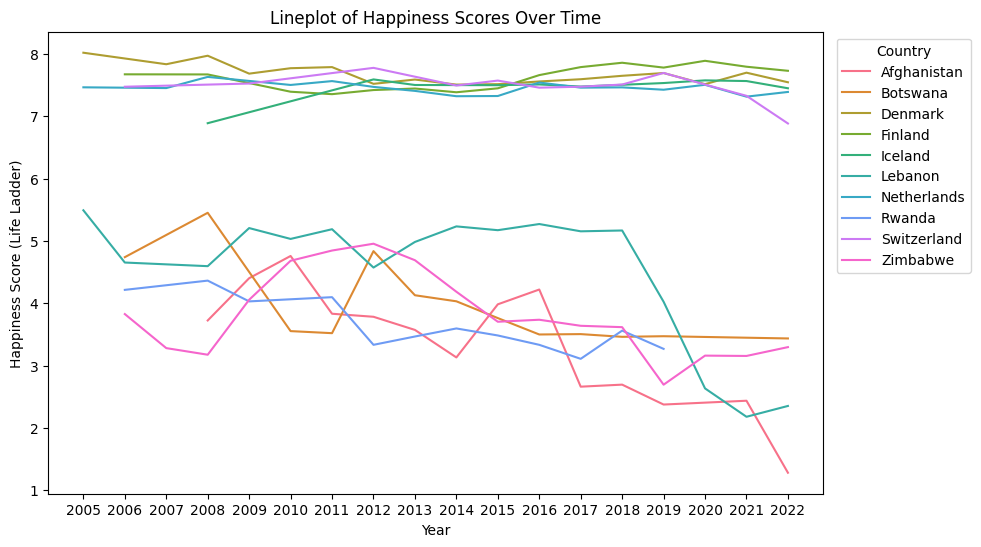

In [3]:
# Creating a lineplot showing the change in happiness scores for several countries over time
top_least_5 = world_happiness[world_happiness['Country Name'].isin(["Finland", "Denmark", "Iceland", "Switzerland", "Netherlands", "Afghanistan", "Lebanon", "Zimbabwe", "Rwanda", "Botswana"])]

sns.set_palette("husl")
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_least_5, x='Year', y='Life Ladder', hue='Country Name')
plt.xlabel('Year')
plt.ylabel('Happiness Score (Life Ladder)')
plt.title('Lineplot of Happiness Scores Over Time')
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1.2, 1))  # Adjust the legend position
plt.xticks(top_least_5['Year'].unique().astype(int))
plt.show()

# # Handling missing values with SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# world_happiness_imputed = pd.DataFrame(imputer.fit_transform(world_happiness.drop(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder'], axis=1)),
#                                        columns=world_happiness.columns[4:])


In [4]:
# Filter data for least happy countries
least_happy_countries = ["Afghanistan", "Lebanon", "Zimbabwe", "Rwanda", "Botswana"]
least_happy = world_happiness[world_happiness['Country Name'].isin(least_happy_countries)]

# Define predictor variables (X) and target variable (y)
X = least_happy[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption']]
y = least_happy['Life Ladder']

# Handling missing values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()  # Remove rows with missing values
y = y[X.index]  # Align target variable

# Add constant term to predictor variables
X = sm.add_constant(X)

# Fit linear regression model
model_least = sm.OLS(y, X).fit()

# Print regression summary
print(model_least.summary())



                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     13.77
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           6.37e-10
Time:                        21:09:52   Log-Likelihood:                -56.220
No. Observations:                  70   AIC:                             126.4
Df Residuals:                      63   BIC:                             142.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [5]:
# Filter data for top happiest countries
most_happy_countries = ["Finland", "Denmark", "Iceland", "Switzerland", "Netherlands"]
most_happy = world_happiness[world_happiness['Country Name'].isin(most_happy_countries)]

# Define predictor variables (X) and target variable (y)
X = most_happy[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption']]
y = most_happy['Life Ladder']

# Handling missing values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()  # Remove rows with missing values
y = y[X.index]  # Align target variable

# Add constant term to predictor variables
X = sm.add_constant(X)

# Fit linear regression model
model_most = sm.OLS(y, X).fit()

# Print regression summary
print(model_most.summary())


                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     11.93
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           9.09e-09
Time:                        21:09:52   Log-Likelihood:                 43.646
No. Observations:                  67   AIC:                            -73.29
Df Residuals:                      60   BIC:                            -57.86
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

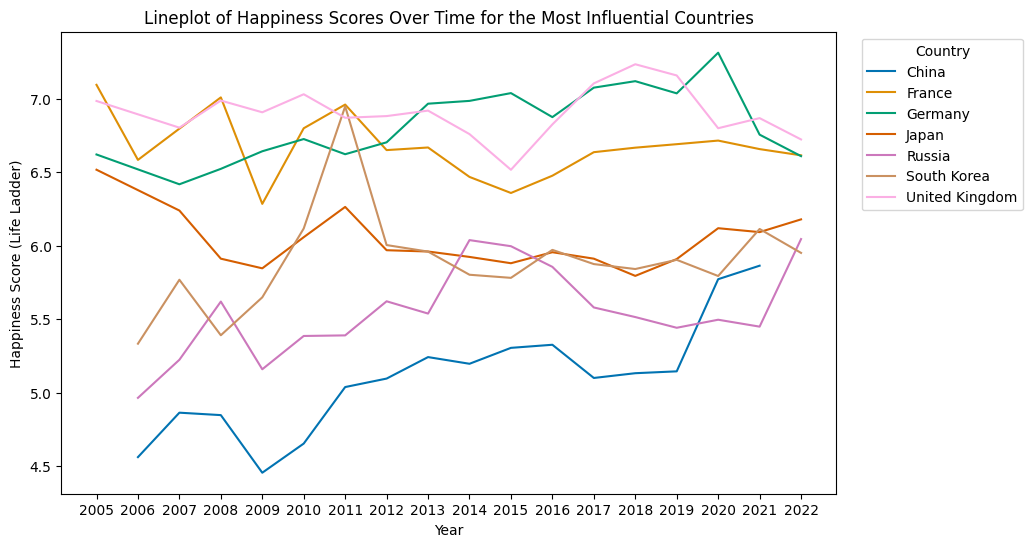

In [6]:
# Creating a lineplot showing the happiness scores of the most influential countries in 2022 over time
select_countries2 = world_happiness[world_happiness['Country Name'].isin(["USA", "China", "Russia", "Germany", "United Kingdom", "South Korea", "France", "Japan"])]

sns.set_palette("colorblind")
plt.figure(figsize=(10, 6))
sns.lineplot(data=select_countries2, x='Year', y='Life Ladder', hue='Country Name')
plt.xlabel('Year')
plt.ylabel('Happiness Score (Life Ladder)')
plt.title('Lineplot of Happiness Scores Over Time for the Most Influential Countries')
plt.xticks(top_least_5['Year'].unique().astype(int))
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [7]:
# Filter data for the most influential countries
influential_countries = ["USA", "China", "Russia", "Germany", "United Kingdom", "South Korea", "France", "Japan"]
select_countries2 = world_happiness[world_happiness['Country Name'].isin(influential_countries)]

# Define predictor variables (X) and target variable (y)
X = select_countries2[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption']]
y = select_countries2['Life Ladder']

# Handling missing values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()  # Remove rows with missing values
y = y[X.index]  # Align target variable

# Add constant term to predictor variables
X = sm.add_constant(X)

# Fit linear regression model
model_top8 = sm.OLS(y, X).fit()

# Print regression summary
print(model_top8.summary())

                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     74.49
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.37e-32
Time:                        21:09:53   Log-Likelihood:                 3.4668
No. Observations:                  95   AIC:                             7.066
Df Residuals:                      88   BIC:                             24.94
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<ipython-input-8-9870b320b757>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


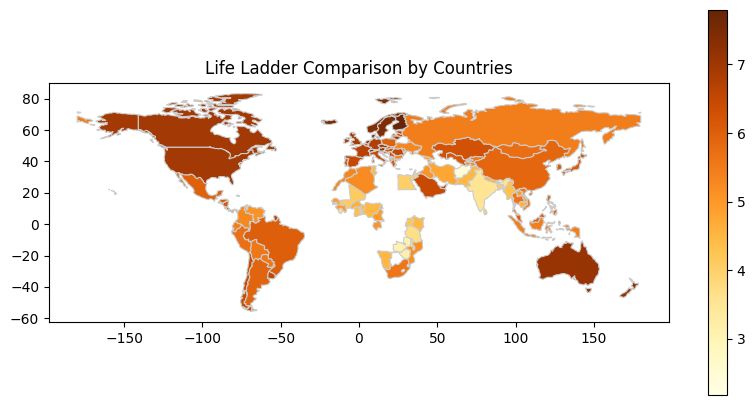

In [8]:
# Filter data for 2021
map_2021 = world_happiness[world_happiness['Year'] == 2021]

# Load world map data
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map.loc[world_map['name'] == 'United States of America', 'name'] = 'United States' # america name problem solved

# Merge map and data
merged = world_map.merge(map_2021, how='left', left_on='name', right_on='Country Name')

# Plot the map
plt.figure(figsize=(10, 5))
merged.plot(column='Life Ladder', cmap='YlOrBr', linewidth=0.8, ax=plt.gca(), edgecolor='0.8', legend=True)
plt.title('Life Ladder Comparison by Countries')
plt.show()

In [9]:
# t-test
african_countries = world_happiness[world_happiness['Regional Indicator'].isin(["Middle East and North Africa", "Sub-Saharan Africa"])]
but_african_countries = world_happiness[~world_happiness['Regional Indicator'].isin(["Middle East and North Africa", "Sub-Saharan Africa"])]

t_stat, p_value = ttest_ind(african_countries['Life Ladder'], but_african_countries['Life Ladder'])
print("t-test results: t-statistic =", t_stat, "p-value =", p_value)

t-test results: t-statistic = -24.81210978814293 p-value = 5.110434315050163e-120


In [10]:
# Define predictor variables (X) and target variable (y)
X = world_happiness[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption']]
y = world_happiness['Life Ladder']

# Handling missing values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()  # Remove rows with missing values
y = y[X.index]  # Align target variable

# Add constant term to predictor variables
X = sm.add_constant(X)

# Fit linear regression model
model_all = sm.OLS(y, X).fit()

# Print regression summary
print(model_all.summary())


                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     995.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:09:55   Log-Likelihood:                -1669.8
No. Observations:                1964   AIC:                             3354.
Df Residuals:                    1957   BIC:                             3393.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

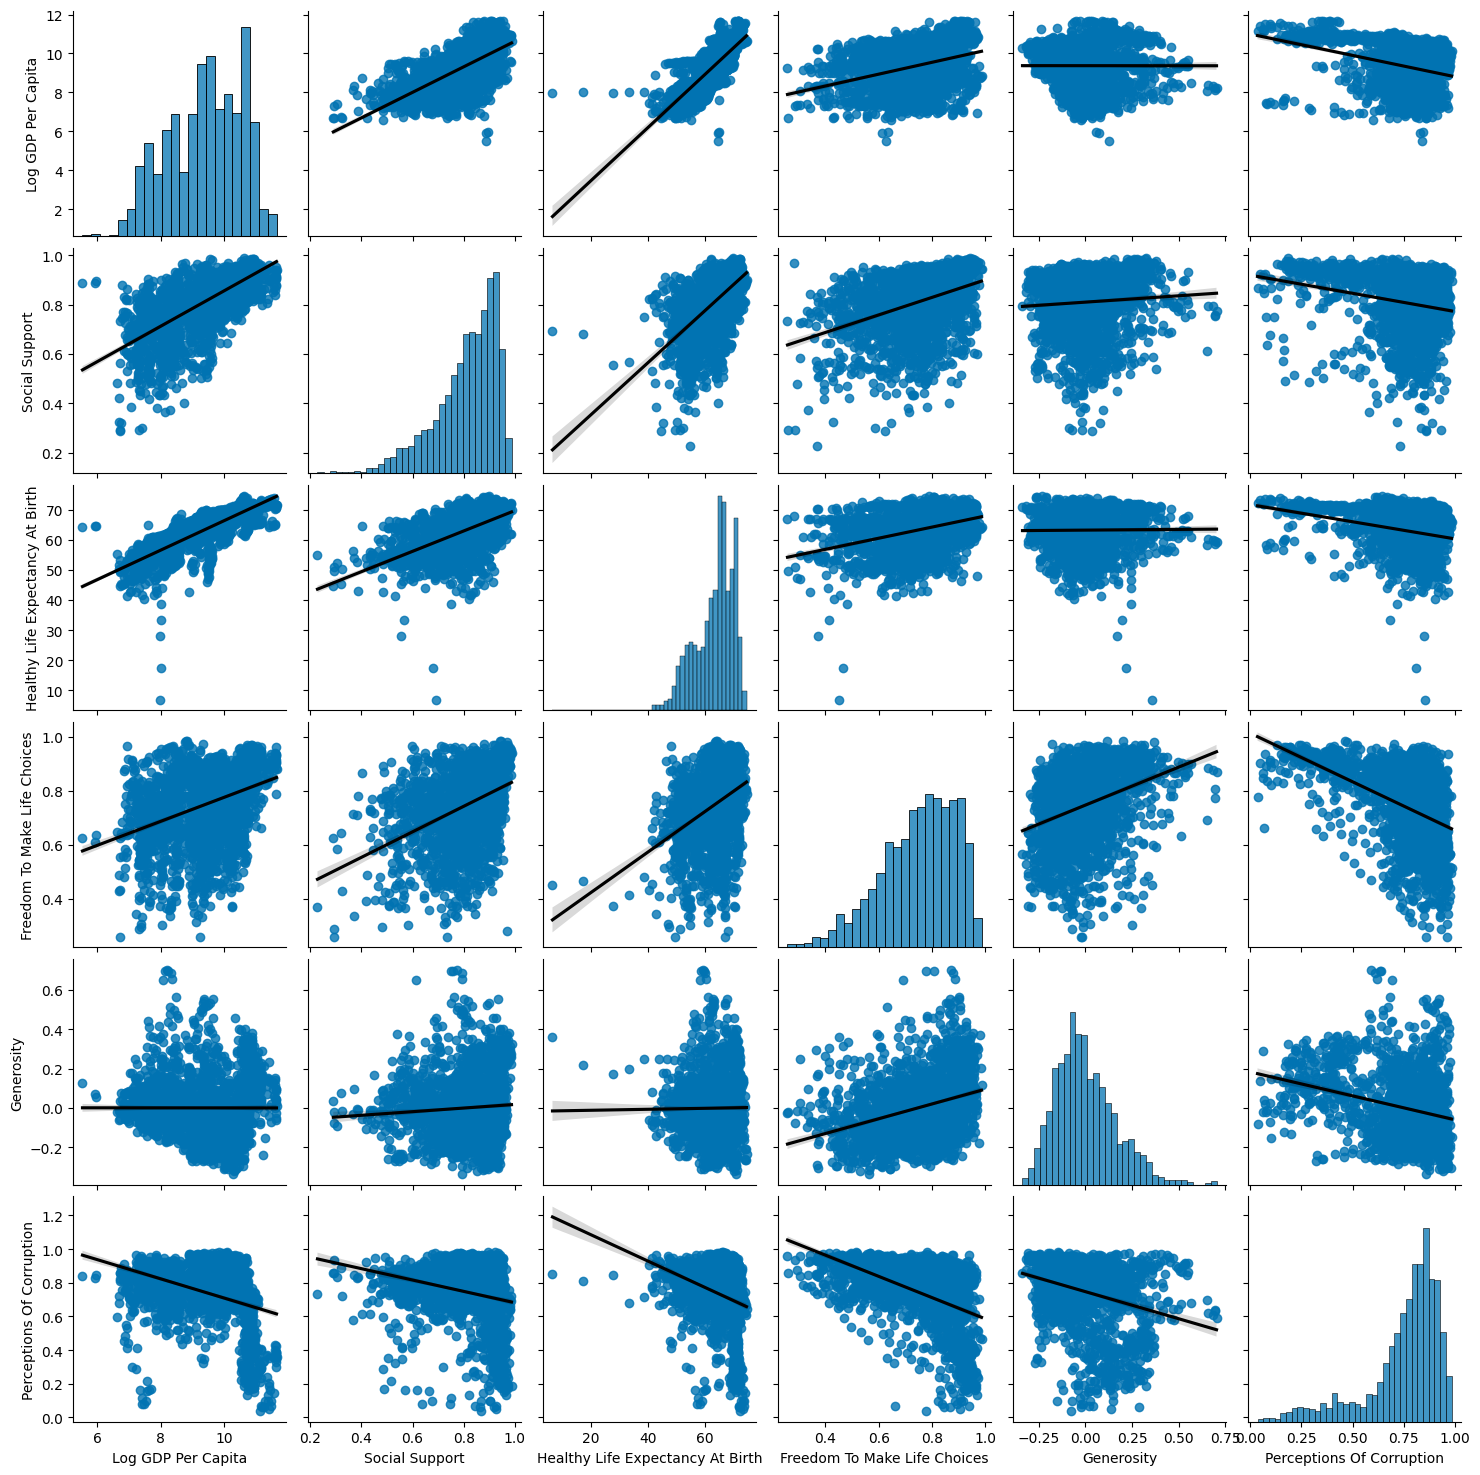

In [12]:
# Multicollinearity Test
sns.pairplot(data=world_happiness,
             vars=["Log GDP Per Capita", "Social Support", "Healthy Life Expectancy At Birth", "Freedom To Make Life Choices", "Generosity", "Perceptions Of Corruption"],
             kind='reg', plot_kws={'line_kws':{'color':'black'}})
plt.show()